<a href="https://colab.research.google.com/github/Diogo-Spencer/Mec-nica-dos-S-lidos-1/blob/main/MSI_TP01_G12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/iLogos/nsst.jpg" width="400" height="100">

# DEMI | NOVA SST

# Mecânica dos Sólidos I (2021/2022)

## Trabalho Prático 1


*   António Marques - 56868 (100%)
*   Diogo Spencer Fortes - 56797 (100%)
*   Maria Inês Teixeirinha- 60659 (100%)

***
#### Enunciado
Considere uma placa de aço ($E = 210$ GPa, $\nu$ = 0.3), como representado na Fig. 1, de dimensões $2a\times 2b$ e com espessura $t$ ($t<a,b$). A placa foi submetida a uma operação de fresagem para a abertura de um furo circular de diâmetro nominal $2R$. Sobre as faces da placa paralelas ao eixo $y$, está aplicada uma carga distribuída de tração e de intensidade $\sigma_0$ (Fig. 1). O sitema de coordenadas $S_0(0,\vec{\imath},\vec{\jmath},\vec{k})$ usado tem a origem no centro do furo e o plano $xy$ coincide com o plano médio da placa. 
<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/msi-tp01_i1.jpg" width="600" height="310">

_Fig 1. Placa com furo submetida a um ensaio de tração uniaxial._

O trabalho foi divido em três pontos, pontos esses que envolviam:
- [1.](#Ponto1) Desenvolver um relatório em formato de código estruturado usando a ferramenta computacional **Jupyter Notebook/JupyterLab** do problema proposto, com o acréscimo de códigos de programação para resolver de forma analítica os pontos requeridos;
- [2.](#Ponto2) Desenvolver o modelo numérico em **ANSYS** da placa com furo e obter o tensor das tensões em pontos definidos;
- [3.](#Ponto3) Comparar e discutir a evolução dos campos de deformação obtidos por vias analítica, numérica e experimental, em zonas criticas do problema, nomeadamente nas proximidades da supérficie do furo.

***
Considere um dado ponto $P$ situado no primeiro quadrante (assumindo m quarto  do modelo pela dupla simetria geométrica, material e  de carregamento do  problema), sobre o qual são conhecidos os vectores de tensão $\vec{t}_1$,  $\vec{t}_2$ e $\vec{t}_3$ (medidos em MPa) associados a três facetas  diferentes, definidos pelos versores $\vec{n}_1$, $\vec{n}_2$ e $\vec{n}_3$ em  $S_0$:

\begin{equation}
\begin{aligned}
\vec{n}_1(P) &= 0.373239~\vec{\imath} + 0.653484~\vec{\jmath} + 0.658522~\vec{k}
\qquad &
\vec{t}{(P,\vec{n}_1)} &= 16.413~\vec{\imath} +1.575~\vec{\jmath} \\
% ----
\vec{n}_2(P) &= -0.653484~\vec{\imath} -0.318654~\vec{\jmath} + 0.686599~\vec{k}
\qquad  &
\vec{t}{(P,\vec{n}_2)} &= -27.193~\vec{\imath} -1.650~\vec{\jmath} \\
% ---
\vec{n}_3(P) &= 0.658522~\vec{\imath} -0.686599~\vec{\jmath} + 0.308108~\vec{k}
\qquad &
\vec{t}{(P,\vec{n}_3)} &= 25.518~\vec{\imath} +0.310~\vec{\jmath}
\end{aligned}
\end{equation}

Considere os seguintes parâmetros para o problema:

- $2a$ = 500 mm, $2b$ = 200 mm, $t$ = 9 mm, $2R$ = 20 mm, $\sigma_0$ = 300 kN/m

***
**<a name="Ponto1">1.</a> Elabore um código estruturado, implementado numa resolução computacional integrada em Jupyter Notebook/JupyterLab, que:**


**a)** Verifique se os três versores podem constituir a base de um referencial cartesiano ortonormal e calcule o tensor das tensões no ponto $P$ em relação a esse sistema de coordenadas $S_1(0,\vec{n}_1, \vec{n}_2, \vec{n}_3)$.


Para verificar se os três versores disponibilizados podem constituir a base do referencial cartesiano ortonormal, devemos verificar se esses versores são **ortonormados** e **ortogonais** entre si, e para isso temos que ter em conta de que:
Os vetores de base $\vec{e}_i$ formam um sistema de coordenadas
ortonormal se verificarem os seguintes produtos escalares:

\begin{equation}
\vec{e}_i \cdot \vec{e}_j = \delta_{ij}~;\quad
\delta_{ij} =
\begin{cases}
1 \quad \mbox{para}\quad i = j \\[1ex]
0 \quad \mbox{para}\quad i \ne j
\end{cases}
\end{equation}

Em que  $ \delta_{ij}$ é o chamado *Delta de Kronecker*

E ainda, temos também de verificar se a base $\vec{e}_i$ forma um sistema de coordenadas
direto ou inverso:

\begin{equation}
\vec{e}_1 \cdot (\vec{e}_2 \times \vec{e}_3) = 1~;
\qquad
\vec{e}_1 \cdot (\vec{e}_2 \times \vec{e}_3) = -1
\end{equation}


Por ultimo, a base $\vec{e}_i$ deve verificar:

\begin{equation}
\vec{e}_i \times \vec{e}_j = \epsilon_{ijk}~\vec{e}_k;\quad
\epsilon_{ijk} =
\begin{cases}
0 \quad \mbox{se $(ijk)$ forem todos iguais}\\[1ex]
1 \quad \mbox{se $(ijk)$ for uma permutação par: i.e. 123,231,
231}\\[1ex]
-1 \quad \mbox{se $(ijk)$ for uma permutação ímpar: i.e. 213,321,
131}
\end{cases}
\end{equation}

Caso o resultado esteja na gama de permutação impar podemos assumir que simplismente esta organização de versores não respeita a Regra da Mão direita, e por isso podemos inverter um dos versores e assim obter a permutação par, que respeita esta regra.


In [21]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

def versor(v1,v2,v3): return np.array([v1,v2,v3])

n1 = versor(0.373239,0.653484,0.658522)
n2 = versor(-0.653484,-0.318654,0.686599)
n3 = versor(0.658522,-0.686599,0.308108)

print('n1 = ',n1)
print('n2 = ',n2)
print('n3 = ',n3)

n1 =  [ 0.373239  0.653484  0.658522]
n2 =  [-0.653484 -0.318654  0.686599]
n3 =  [ 0.658522 -0.686599  0.308108]


Ortonormalidade

In [22]:
print('i = j: ')
print(f'np.dot(n1,n1) = {np.dot(n1,n1):.1f}')
print(f'np.dot(n2,n2) = {np.dot(n2,n2):.1f}')
print(f'np.dot(n3,n3) = {np.dot(n3,n3):.1f}')

i = j: 
np.dot(n1,n1) = 1.0
np.dot(n2,n2) = 1.0
np.dot(n3,n3) = 1.0


Ortogonalidade

In [42]:
print('i diferente j: ')
print(f'np.dot(n2,n3) = {np.dot(n2,n3):.1f}')
print(f'np.dot(n1,n3) = {np.dot(n1,n3):.1f}')
print(f'np.dot(n1,n2) = {np.dot(n1,n2):.1f}')

i diferente j: 
np.dot(n2,n3) = 0.0
np.dot(n1,n3) = 0.0
np.dot(n1,n2) = -0.0


Como podemos ver os três versores podem constituir a base de um referencial cartesiano ortonormal.

In [24]:
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

def trans01(i0i1,i0j1,i0k1,j0i1,j0j1,j0k1,k0i1,k0j1,k0k1):
    linha0 = [i0i1,j0i1,k0i1]
    linha1 = [i0j1,j0j1,k0j1]
    linha2 = [i0k1,j0k1,k0k1]
    return np.array([linha0,linha1,linha2])

Aij = trans01(n1[0],n2[0],n3[0],n1[1],n2[1],n3[1],n1[2],n2[2],n3[2])
print(f'\n Matriz de mudanca de base de S0 para S1: \n Aij = \n {Aij}')


 Matriz de mudanca de base de S0 para S1: 
 Aij = 
 [[ 0.373239  0.653484  0.658522]
 [-0.653484 -0.318654  0.686599]
 [ 0.658522 -0.686599  0.308108]]


A matriz de mudança de base representando a transformação do sistema
de coordenadas $S_0(\vec{\imath},\vec{\jmath},\vec{k})$ em $S_1(0,\vec{n}_1,\vec{n}_2,\vec{n}_3)$,
é assim definida:

\begin{equation}
\begin{aligned}[t]
\underline{\underline{T}}_{0/1} &=
\begin{bmatrix}
0.373239 & 0.653484 & 0.658522 \\
-0.653383 & -0.318654 & 0.686599 \\
0.658522 & -0.686599 & 0.308108 \\
\end{bmatrix} =
\begin{bmatrix}
\vec{n}_1^T \\
\vec{n}_2^T \\
\vec{n}_3^T \\
\end{bmatrix}
\end{aligned}
\end{equation}

A partir da obtenção deste matriz Aij, podemos calcular os componentes dos vetores tensão no referencial original, S0, e posteriormente no referencial de interesse, o S1.

Um bom critério para se ter uma ideia de que os valores serão os mais acertados é começar com uma verificação da matriz Aij, pois caso esta esteja com algum defeito, irá nos fornecer valores equivocados. A verificação do Aij é bem simples, só tem-se que verificar de que o determinante dessa matriz corresponde ao valor 1 (caso o determinante tenha o valor -1, basta inverter um dos versores, para respeitar a regra da mão direita).

In [25]:
print('[Aij^T][Aij] = [I] = \n',np.dot(np.transpose(Aij),Aij))
print('\n det([Aij]) = ','{: 0.1f}'.format(np.linalg.det(Aij)))

[Aij^T][Aij] = [I] = 
 [[ 1.000000  0.000000  0.000001]
 [ 0.000000  1.000000 -0.000001]
 [ 0.000001 -0.000001  1.000000]]

 det([Aij]) =   1.0


Após a verificação da matriz Aij, só basta resolver os componentes dos vetores tensão em ambos os referenciais, S0 e S1, e posteriormente calcular o tensor das tensões no referencial S1, que iremos chamar de **sigma1**.

In [26]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

S0tn1 = np.array([[16.413],[1.575],[0]])
S0tn2 = np.array([[-27.193],[-1.650],[0]])
S0tn3 = np.array([[25.518],[0.310],[0]])
print('Componentes dos vetores tensao no referencial S0 :')
print('t(n1).S0 | t(n2).S0 | t(n3).S0')
for i in range(0,3):
    print(S0tn1[i],' ',S0tn2[i],' ',S0tn2[i])

Componentes dos vetores tensao no referencial S0 :
t(n1).S0 | t(n2).S0 | t(n3).S0
[ 16.41300]   [-27.19300]   [-27.19300]
[ 1.57500]   [-1.65000]   [-1.65000]
[ 0.00000]   [ 0.00000]   [ 0.00000]


In [27]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
S1tn1 = np.dot(Aij,S0tn1)
S1tn2 = np.dot(Aij,S0tn2)
S1tn3 = np.dot(Aij,S0tn3)

print('Componentes dos vetores tensao no referencial S1 :')
print('tn1.S1 | tn2.S1 | tn3.S1')
for i in range(0,3):
    print(S1tn1[i],' ',S1tn2[i],' ',S1tn2[i])

Componentes dos vetores tensao no referencial S1 :
tn1.S1 | tn2.S1 | tn3.S1
[ 7.15521]   [-11.22774]   [-11.22774]
[-11.22751]   [ 18.29597]   [ 18.29597]
[ 9.72693]   [-16.77430]   [-16.77430]


In [28]:
sigma1 = np.hstack((S1tn1,S1tn2,S1tn3))
print('sigma1 = \n', sigma1)

sigma1 = 
 [[ 7.15521 -11.22774  9.72689]
 [-11.22751  18.29597 -16.77439]
 [ 9.72693 -16.77430  16.59132]]


**b)** Obtenha o tensor das tensões no ponto $P$, mas agora referido ao sistema de coordenadas $S_0(0,\vec{\imath}, \vec{\jmath}, \vec{k})$.


Para este caso, após ter obtido a matriz Aij e o tensor das tensões no referencial S1, basta resolver a equação abaixo indicada para obter o tensor das tensões no referencial S0, o **sigma0**.
\begin{equation}
\begin{aligned}
&^0\underline{\underline{\sigma}} = \underline{\underline{T}}_{1/0}\,^1\underline{\underline{\sigma}}~
\underline{\underline{T}}_{1/0}^T = \underline{\underline{T}}_{0/1}^T\,^1\underline{\underline{\sigma}}~
\underline{\underline{T}}_{0/1}
\end{aligned}
\end{equation}

In [29]:
Aji = np.transpose(Aij)
sigma0 = np.dot(Aji, np.dot(sigma1, np.transpose(Aji)))
print('\nsigma0 = \n', sigma0)



sigma0 = 
 [[ 40.70032  1.87016 -0.00007]
 [ 1.87026  1.34217 -0.00020]
 [ 0.00002  0.00000  0.00000]]


**c)** Determine analiticamente as tensões principais e as matrizes de transformação do sistema de coordenadas $S_1$ e $S_0$ para o referencial principal $S_P(0,\vec{e}_\mathrm{I},\vec{e}_\mathrm{II},\vec{e}_\mathrm{III})$.


Para esta alínea, podiamos ter resolvido de duas formas:
-  De forma analítica, onde nos baseávamos nas equações de vetores e valores próprios, em que usamos 
\begin{equation}
(\sigma_{ij}-\sigma\delta_{ij})n_j = 0 \Leftrightarrow
(\tilde{\sigma}-\sigma\tilde{I}) \cdot \vec{n} = 0
\end{equation}

  para o cálculo das tensões principais (valores próprios), e 
\begin{equation}
(\sigma_{11}-\sigma_\mathrm{n})n_1 + \sigma_{12} n_2  + \sigma_{13} n_3 = 0 \\[1ex]
\sigma_{21}n_1 + (\sigma_{22}-\sigma_\mathrm{n}) n_2  + \sigma_{23} n_3 = 0 \\[1ex]
\sigma_{31}n_1 + \sigma_{32} n_2  + (\sigma_{33}-\sigma_\mathrm{n}) n_3 = 0
\end{equation}

  para as direções principais (vetores próprios);



-  de forma mais visual e gráfica, utilizando o denominado **Círculo de Mohr**

Neste trabalho prático, decidimos resolver o problema de uma forma mais analítica, onde conseguimos retirar os valores

In [30]:
from sympy.solvers import solve
from sympy import symbols


d1,d2,d3 = symbols('d1 d2 d3')

def eq1(d1,d2,d3,vp): return (sigma0[0,0] - vp)*d1 + sigma0[0,1]*d2 + sigma0[0,2]*d3
def eq2(d1,d2,d3,vp): return sigma0[1,0]*d1 + (sigma0[1,1] - vp)*d2 + sigma0[1,2]*d3
def eq3(d1,d2,d3,vp): return sigma0[2,0]*d1 + sigma0[2,1]*d2 + (sigma0[2,2] - vp)*d3
def eq4(d1,d2,d3): return d1**2 + d2**2 + d3**2 - 1

def versor(e1,e2,e3): return np.array([e1,e2,e3])


print('\n Calculo dos invariantes pela matriz das tensões  : ............................')

I1 = np.trace(sigma0)
print('1º Invariante, I1:', '{:.6f}'.format(I1))

I2 = 0.5*(np.trace(sigma0)**2 -np.trace(np.dot(sigma0,sigma0)))
print('2º Invariante, I2 :', '{:.6f}'.format(I2))

I3 = np.linalg.det(sigma0)
print('3º Invariante, I3 :', '{:.6f}'.format(I3))

print('\n Resolucao Simbolica - Sympy : ............................')
x = symbols('x')
def eqcar(x): return x**3 - I1*x**2 + I2*x - I3
print('\n Equacao carateristica:')
print(eqcar(x),' = 0')
valproprios = solve(eqcar(x), x, dict=True)
print('\n sol : ')
print(valproprios)
print('\n Resolucao Numerica - Numpy : ............................')
valpropriosN = np.roots([1,-I1,I2,-I3])
print('\n Roots = ',-np.sort(-valpropriosN))

print('\n Resolucao Analítica - Formula recursiva Poly3: ..........')
print('\n p(x) = x**3 + a x**2 + b*c + c = 0')
def frPoly3(a,b,c):
    p = b-a**2/3
    q = (2*a**3)/27 - (a*b)/3 + c
    DeltaPoly3 = q**2/4 + p**3/27
    print('\nDelta(Poly3) :', DeltaPoly3)
    if DeltaPoly3 < 0:
        print('existe três soluções reais')
        x1 = (2/np.sqrt(3))*np.sqrt(-p)*np.sin((1/3)*np.arcsin((3*np.sqrt(3)*q)/(2*np.sqrt(-p)**3))) - a/3
        x2 = -(2/np.sqrt(3))*np.sqrt(-p)*np.sin((1/3)*np.arcsin((3*np.sqrt(3)*q)/(2*np.sqrt(-p)**3)) + np.pi/3) - a/3
        x3 = (2/np.sqrt(3))*np.sqrt(-p)*np.cos((1/3)*np.arcsin((3*np.sqrt(3)*q)/(2*np.sqrt(-p)**3)) + np.pi/6) - a/3
    elif DeltaPoly3 == 0:
        print('existe três raízes repetidas')
        x1 = -2*(q/2)**(1/3) - a/3
        x2 = (q/2)**(1/3) - a/3
        x3 = x2
    else:
        print('existe apenas uma única solução real')
        x1 = (-q/2 + np.sqrt(DeltaPoly3))**(1/3) + (-q/2 - np.sqrt(DeltaPoly3))**(1/3) - a/3
        x2 = x1; x3 = x1

    return  np.array([x1,x2,x3])

valpropfrPoly3 = frPoly3(-I1,I2,-I3)
print('\n Formula recursiva Poly3 = ',-np.sort(-valpropfrPoly3))


 Calculo dos invariantes pela matriz das tensões  : ............................
1º Invariante, I1: 42.042495
2º Invariante, I2 : 51.129129
3º Invariante, I3 : -0.000000

 Resolucao Simbolica - Sympy : ............................

 Equacao carateristica:
x**3 - 42.0424952957483*x**2 + 51.1291290243797*x + 5.642358688587e-14  = 0

 sol : 
[{x: -1.10355071487656e-15 - 0.e-35*I}, {x: 1.25350312178128 - 0.e-21*I}, {x: 40.788992173967 - 0.e-21*I}]

 Resolucao Numerica - Numpy : ............................

 Roots =  [ 40.78899  1.25350 -0.00000]

 Resolucao Analítica - Formula recursiva Poly3: ..........

 p(x) = x**3 + a x**2 + b*c + c = 0

Delta(Poly3) : -37834.436023730785
existe três soluções reais

 Formula recursiva Poly3 =  [ 40.78899  1.25350 -0.00000]


In [48]:
valores,vectores = np.linalg.eig(sigma1)
print(valores,vectores)
valores0,vectores0 = np.linalg.eig(sigma0)
ind=np.argsort(valores)[::-1] # índices dos valores ordenados

print('1ª Direcção principal:',vectores0[ind[0]])
print('2ª Direcção principal:',vectores0[ind[1]])
print('3ª Direcção principal:',vectores0[ind[2]])

print(' ') 


[ 40.788994  0.000000  1.253503] [[-0.403768  0.658624 -0.635076]
 [ 0.667842  0.686552  0.287350]
 [-0.625267  0.307995  0.717014]]
1ª Direcção principal: [ 0.998878  0.047356 -0.000006]
2ª Direcção principal: [ 0.000001  0.000001  1.000000]
3ª Direcção principal: [ 0.047359 -0.998878  0.000159]
 


**d)** Determine os invariantes da matriz do tensor das tensões obtido na alínea a) e demonstre que esses invariantes são idênticos aos calculados a partir da matriz do tensor das tensões principais.


Para calcular as invariantes utilizamos estas equações:

\begin{equation}
\begin{aligned}
I_1 &= \mathrm{Tr}(\sigma_{ij}) \\
I_2 &= \frac{1}{2}\left[ \mathrm{Tr}(\sigma_{ij})^2 - \mathrm{Tr}(\sigma_{ij}^2) \right] =
\frac{1}{2}\left( \sigma_{ii}\sigma_{jj} - \sigma_{ij}\sigma_{ji} \right) \\
& =
\begin{vmatrix}
\sigma_{11} & \sigma_{12} \\
\sigma_{21} & \sigma_{22} \\
\end{vmatrix} +
\begin{vmatrix}
\sigma_{11} & \sigma_{13} \\
\sigma_{31} & \sigma_{33} \\
\end{vmatrix} +
\begin{vmatrix}
\sigma_{22} & \sigma_{23} \\
\sigma_{32} & \sigma_{33} \\
\end{vmatrix} \\\\
I_3 &= \mathrm{det}(\sigma_{ij}) \\
\end{aligned}
\end{equation}

In [31]:
I1 = np.trace(sigma0)
print('1º Invariante, I1 :', '{:.6f}'.format(I1))

I2 = 0.5*(np.trace(sigma0)**2 -np.trace(np.dot(sigma0,sigma0)))
print('2º Invariante, I2 :', '{:.6f}'.format(I2))

I3 = np.linalg.det(sigma0)
print('2º Invariante, I3 :', '{:.6f}'.format(I3))


1º Invariante, I1 : 42.042495
2º Invariante, I2 : 51.129129
2º Invariante, I3 : -0.000000


Como temos a regra de que I1>I2>I3:

In [50]:
sigma0I =np.array([[I2,0,0],[0,I1,0],[0,0,I3]])
print('sigma0I = \n', sigma0I)

sigma0I = 
 [[ 51.129129  0.000000  0.000000]
 [ 0.000000  42.042495  0.000000]
 [ 0.000000  0.000000 -0.000000]]


In [51]:
I1 = np.trace(sigma1)
print('1º Invariante, I1 :', '{:.6f}'.format(I1))

I2 = 0.5*(np.trace(sigma1)**2 -np.trace(np.dot(sigma1,sigma1)))
print('2º Invariante, I2 :', '{:.6f}'.format(I2))

I3 = np.linalg.det(sigma1)
print('2º Invariante, I3 :', '{:.6f}'.format(I3))


1º Invariante, I1 : 42.042497
2º Invariante, I2 : 51.129139
2º Invariante, I3 : 0.000000


In [52]:
sigma1I =np.array([[I2,0,0],[0,I1,0],[0,0,I3]])
print('sigma1I = \n', sigma1I)

sigma1I = 
 [[ 51.129139  0.000000  0.000000]
 [ 0.000000  42.042497  0.000000]
 [ 0.000000  0.000000  0.000000]]


Como podemos observar pelos valores obtidos, confirmamos de que os invariantes de ambos os tensores de tensão, **sigma0** e **sigma1** são exatamente iguais.

**e)** Considere agora o plano definido pelo versor $\vec{v} \equiv \underline{v} =[1/\sqrt{2}, 0, 1/\sqrt{2}]$ e determine as componentes normal e tangencial da tensão nesse plano.


A componente de tensão normal pode obter-se pelo produto escalar entre os vetores:

\begin{equation}
\begin{aligned}
\sigma_n &= \vec{t}^{(\vec{n})} \cdot \vec{n} = t_i \cdot n_i = n_i \cdot \sigma_{ji} \cdot n_j \\
& = \begin{bmatrix}
n_1 & n_2 & n_3
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} & \sigma_{21} & \sigma_{31} \\
\sigma_{12} & \sigma_{22} & \sigma_{32} \\
\sigma_{13} & \sigma_{23} & \sigma_{33}
\end{bmatrix}
\begin{bmatrix}
n_1 \\ n_2 \\ n_3
\end{bmatrix}
\end{aligned}
\end{equation}

A componente de tensão de corte vem:

\begin{equation}
\tau = \sqrt{||\vec{t}||^2 -\sigma_n^2}
= \sqrt{\vec{t}^{(\vec{n})} \cdot \vec{t}^{(\vec{n})} -\sigma_n^2}
\end{equation}

In [33]:
import numpy as np
sigma0 = np.dot(Aji, np.dot(sigma1, np.transpose(Aji)))
print('\nsigma0 = \n', sigma0)



sigma0 = 
 [[ 40.70032  1.87016 -0.00007]
 [ 1.87026  1.34217 -0.00020]
 [ 0.00002  0.00000  0.00000]]


In [53]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

def versor(v1,v2,v3): return np.array([v1,v2,v3])

v = versor(1/np.sqrt(2),0,1/np.sqrt(2))

print('v = ', v)


v =  [ 0.707107  0.000000  0.707107]


In [54]:
t=np.dot(v,sigma0)

print('t=', t)

t= [ 28.779489  1.322402 -0.000046]


In [55]:
sigma_nor= np.dot(v,np.transpose(t))

print('sigma_nor (MPa) =',sigma_nor)

sigma_nor (MPa) = 20.35013960946886


In [57]:
sigma_tan=np.sqrt(np.dot(t,t)-(sigma_nor)**2)

print('sigma_tan (Mpa) =', sigma_tan)

sigma_tan (Mpa) = 20.393125733972166


**f)** Utilizando as equações analíticas (obtidas através da função tensão de _Airy_  para uma placa de dimensão muito superior ao diâmetro do furo, determine aproximadamente as coordenadas do ponto $P$ que apresenta o tensor das tensões calculado em b), assumindo o menor erro relativo entre os elementos do tensor das tensões calculados em b) e os obtidos analiticamente.


Nesta alínea tivemos que ter em conta a conversão das coordenadas cartesianas para as coordenadas polares, utilizando as equações da função tensão de *Airy*:

Seja $\tilde{\sigma}$ um tensor das tensões com componentes numa base polar e cartesiana definidas por:

\begin{equation}
\left[\sigma_{r\theta}\right] \equiv
\begin{bmatrix}
\sigma_{rr} & \sigma_{r\theta} \\
\sigma_{r\theta} & \sigma_{\theta\theta}
\end{bmatrix}
\quad\wedge\quad
\left[\sigma_{xy}\right] \equiv
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{xy} & \sigma_{yy}
\end{bmatrix}
\end{equation}

Pela propriedade de transformação de um tensor de segunda ordem, as duas matrizes estão relacionadas por:

\begin{equation}
\begin{aligned}
\left[\sigma_{r\theta}\right] &= [Q] \left[\sigma_{xy}\right] [Q]^T \\
\begin{bmatrix}
\sigma_{rr} & \sigma_{r\theta} \\
\sigma_{r\theta} & \sigma_{\theta\theta}
\end{bmatrix}
&=
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{xy} & \sigma_{yy}
\end{bmatrix}
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\end{aligned}
\end{equation}

ou,

\begin{equation}
\begin{aligned}
\left[\sigma_{xy}\right] &= [Q]^T \left[\sigma_{r\theta}\right] [Q] \\
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{xy} & \sigma_{yy}
\end{bmatrix}
&=
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
\sigma_{rr} & \sigma_{r\theta} \\
\sigma_{r\theta} & \sigma_{\theta\theta}
\end{bmatrix}
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
\end{aligned}
\end{equation}

_Nota: Componentes polares do tensor das tensões para o problema de tração de placa com furo_

Condições de fronteira do problema:

- Coordenadas cartesianas:

    \begin{equation}
    \sigma_{xx}(\pm a/2,y) \equiv \sigma_0 = Q
    \quad\wedge\quad
    \sigma_{yy}(x,\pm b/2) = \sigma_{xy}(\pm a/2,y) =
    \sigma_{xy}(x,\pm b/2) = 0
    \end{equation}

- Coordenadas polares:

    \begin{equation}
    \sigma_{rr}(R,\theta) = 0
    \quad\wedge\quad
    \sigma_{r\theta}(R,\theta) = 0
    \end{equation}

Assumindo o diâmetro do furo ($2R$) bastante inferior à altura da plata ($2b$), o campo de tensão da placa pode ser expresso, para uma região circular de raio $c>R$ (Fig. 1), pelas seguintes expressões analíticas:

\begin{equation}
\begin{cases}
\sigma_{rr} &=
\displaystyle\frac{\sigma_0}{2}
\left[\left
(1-\frac{R^2}{r^2}\right)
+\left(1+\frac{3R^4}{r^4}-\frac{4R^2}{r^2}\right)\cos2\theta\right] \\
\sigma_{\theta\theta} &= \displaystyle\frac{\sigma_0}{2}\left[\left
(1+\frac{R^2}{r^2}\right)
-\left(1+\frac{3R^4}{r^4}\right)\cos2\theta\right] \\
\sigma_{r\theta} &= -\displaystyle\frac{\sigma_0}{2}
\left(1-\frac{3R^4}{r^4}+\frac{2R^2}{r^2}\right)\sin2\theta
\end{cases}
\end{equation}

De notar que as tensões na periferia do raio de diâmetro $c$ (Fig. 1) são próximas das tensões que a placa teria se não tivesse o furo (como consequência do princípio de _Staint-Venant_).

De acordo com a solução analítica do problema, a tensão máxima ocorre para $r=R$ e $\theta = \pm 90^\circ$:

\begin{equation}
\sigma_\textrm{max} = \sigma_{\theta\theta}(R\,,\pm \pi/2)= 3
\sigma_0
\quad\wedge\quad
\sigma_0 = \frac{F}{bt}
\end{equation}

In [58]:
import math as m
import numpy as np

R = 10
b = 100
t = 9
Q = 300
err=100000
S0=300/t


def sigrr(r,t):
    return S0/2*((1-R**2/r**2) + (1+3*R**4/r**4 - 4*R**2/r**2)*np.cos(2*t))

def sigtt(r,t):
    return S0/2*((1+R**2/r**2) - (1+3*R**4/r**4)*np.cos(2*t))

def sigrt(r,t):
    return -S0/2*(1-3*R**4/r**4 + 2*R**2/r**2)*np.sin(2*t)


for raio in np.arange(10,100,0.05):
  for teta in np.arange(0, np.pi/2,np.pi/1000):
    
    sigma_rr = sigrr(raio,teta)
    sigma_tt = sigtt(raio,teta)
    sigma_rt = sigrt(raio,teta)
    sigmaPo  = np.array([[sigma_rr, sigma_rt],[sigma_rt, sigma_tt]])

    A_trans = np.array([[np.cos(teta),-np.sin(teta)],[np.sin(teta),np.cos(teta)]])
    Po = np.dot(A_trans,np.dot(sigmaPo,np.transpose(A_trans)) )
    
    err1=(np.abs(sigma0[0,0]-Po[0,0])/sigma0[0,0])
    err2=(np.abs(sigma0[1,1]-Po[1,1])/sigma0[1,1])
    err3=(np.abs(sigma0[0,1]-Po[0,1])/sigma0[0,1])
    errmed=np.sqrt(err1**2+err2**2+err3**2)*100

    if errmed < err:
      err = errmed
      te=teta
      ra=raio
degrees= te* 180/(np.pi)  
print('erro(%): ', err)
print('teta(º): ', degrees)
print('raio(mm): ', ra)

x = np.cos(degrees)*ra
y = np.sin(degrees)*ra
P = np.array([ra*np.cos(degrees), ra*np.sin(degrees)])
print('Coordenadas P: ', P)

erro(%):  3.0715294175625414
teta(º):  64.25999999999999
raio(mm):  20.45000000000015
Coordenadas P:  [ 2.907297  20.242286]


***
**<a name="Ponto1">2.</a> Utilizando o programa de elementos finitos ANSYS crie um modelo numérico da placa com furo.**



**a)** Obtenha o tensor das tensões nos pontos $P$, $A(0,R/2, 0)$ e $B(R/2,0,0)$. Compare os resultados com os obtidos através das equações analíticas utilizadas na alínea 1.f).


Sabemos que o ponto A tem como coordenadas (0,R/2,0) e o ponto B tem como coordenadas (R/2,0,0). Assim, temos que A=(0,5,0) e B=(5,0,0).
Através da função nlist do *ANSYS* é possível obter a lista de nós da placa. Deste modo, encontra-se os nós que correspondem aos pontos: A- nó 120; B- nó 1.
Uma vez que já sabemos os nós, podemos obter o tensor de tensões para cada um.

Assim:

\begin{equation}
\sigma_{A} =
\begin{bmatrix}
\sigma_{xx} & \tau_{xy} & \tau_{xz} \\
\tau_{xy} & \sigma_{yy} & \tau_{zy} \\
\tau_{xz} & \tau_{yz} & \sigma_{zz}
\end{bmatrix} =
\begin{bmatrix}
101.69 & 0.46439 & 0 \\
0.46439 & 10.365 & 0 \\
0 & 0 & 0
\end{bmatrix}
\end{equation}

\begin{equation}
\sigma_{B} =
\begin{bmatrix}
\sigma_{xx} & \tau_{xy} & \tau_{xz} \\
\tau_{xy} & \sigma_{yy} & \tau_{zy} \\
\tau_{xz} & \tau_{yz} & \sigma_{zz}
\end{bmatrix} =
\begin{bmatrix}
-3.5410 & -2.2713 & 0 \\
-2.2713 & -33.770 & 0 \\
0 & 0 & 0
\end{bmatrix}
\end{equation}

Nota: apesar de A e B serem dois pontos que se encontram nas extremidades do furo, é curioso observar que apresentam valores de tensão bastante diferentes.


Para o ponto P, sabendo que r=20.562 e $\theta$=1.121548, conseguimos calcular as coordenadas cartesianas do ponto. Assim, temos que P=(8.91, 18.53). Visto que não foi possível encontrar nenhum nó com as mesmas coordenadas que o ponto obtido, decidimos calcular o tensor de tensões (através do ANSYS) para um nó com coordenadas próximas às do ponto P. Assim, procedendo da mesma forma descrita anteriormente, é possível calcular o tensor das tensões para o nó 364 com coordenads (9.2418, 20.331).

Neste sentido:

\begin{equation}
\sigma_{Paprox} =
\begin{bmatrix}
\sigma_{xx} & \tau_{xy} & \tau_{xz} \\
\tau_{xy} & \sigma_{yy} & \tau_{zy} \\
\tau_{xz} & \tau_{yz} & \sigma_{zz}
\end{bmatrix} =
\begin{bmatrix}
40.700 & 1.8701 & 0 \\
1.8701 & 1.3416 & 0 \\
0 & 0 & 0
\end{bmatrix}
\end{equation}

Comparando $\sigma_{Paprox}$ com $\sigma_{P}$ os valores de tensão são muito próximos porém, em P, observam-se maiores valores de $\sigma_{xx}$ e $\tau_{xy}$ e menor valor em $\sigma_{yy}$. Fazendo uma análise das coordenadas de P e do nó 364, pode-se afirmar que o ponto P é um ponto que se encontra numa posição mais próxima do furo relativamente aos dois eixos. Assim sendo, é expectável que se verifiquem maiores valores de tensão em P do que em Paprox.

**b)** Faça uma avaliação do impacto das dimensões da placa e furo no valor do coeficiente de concentração de tensões $K$. Comente os resultados.


Pelo ANSYS conseguimos obter o valor de KT= 2.6494979 (fig.2).
Através da análise do gráfico observa-se que à medida que o KT aumenta, o valor de 2r/D diminui. Assim, podemos comparar a dimensão do furo com a dimensão da altura da placa. Ou seja, quanto menor for o valor de 2r/D, maior vai ser o tamanho da placa relativamente ao furo. Contrariamente, quanto maior for o valor dessa divisão, maior será o tamanho do furo e menor será a dimensão da placa.

Obtivemos algumas imagens a partir do *Ansys* para demonstrar melhor o andamento (fig.3, fig.4)


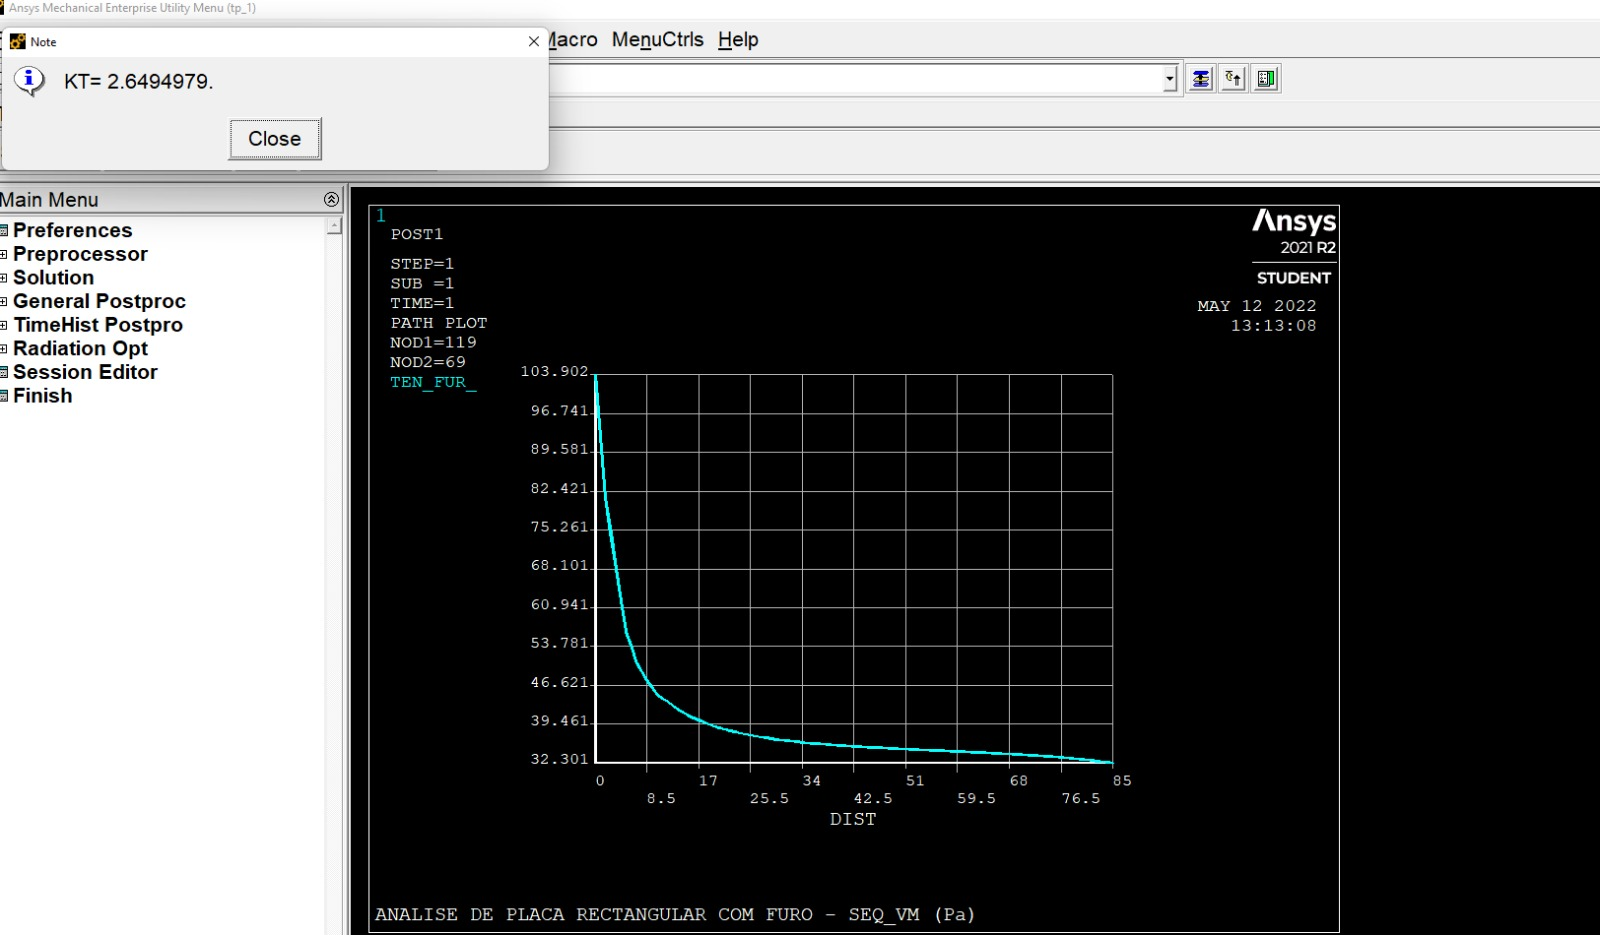

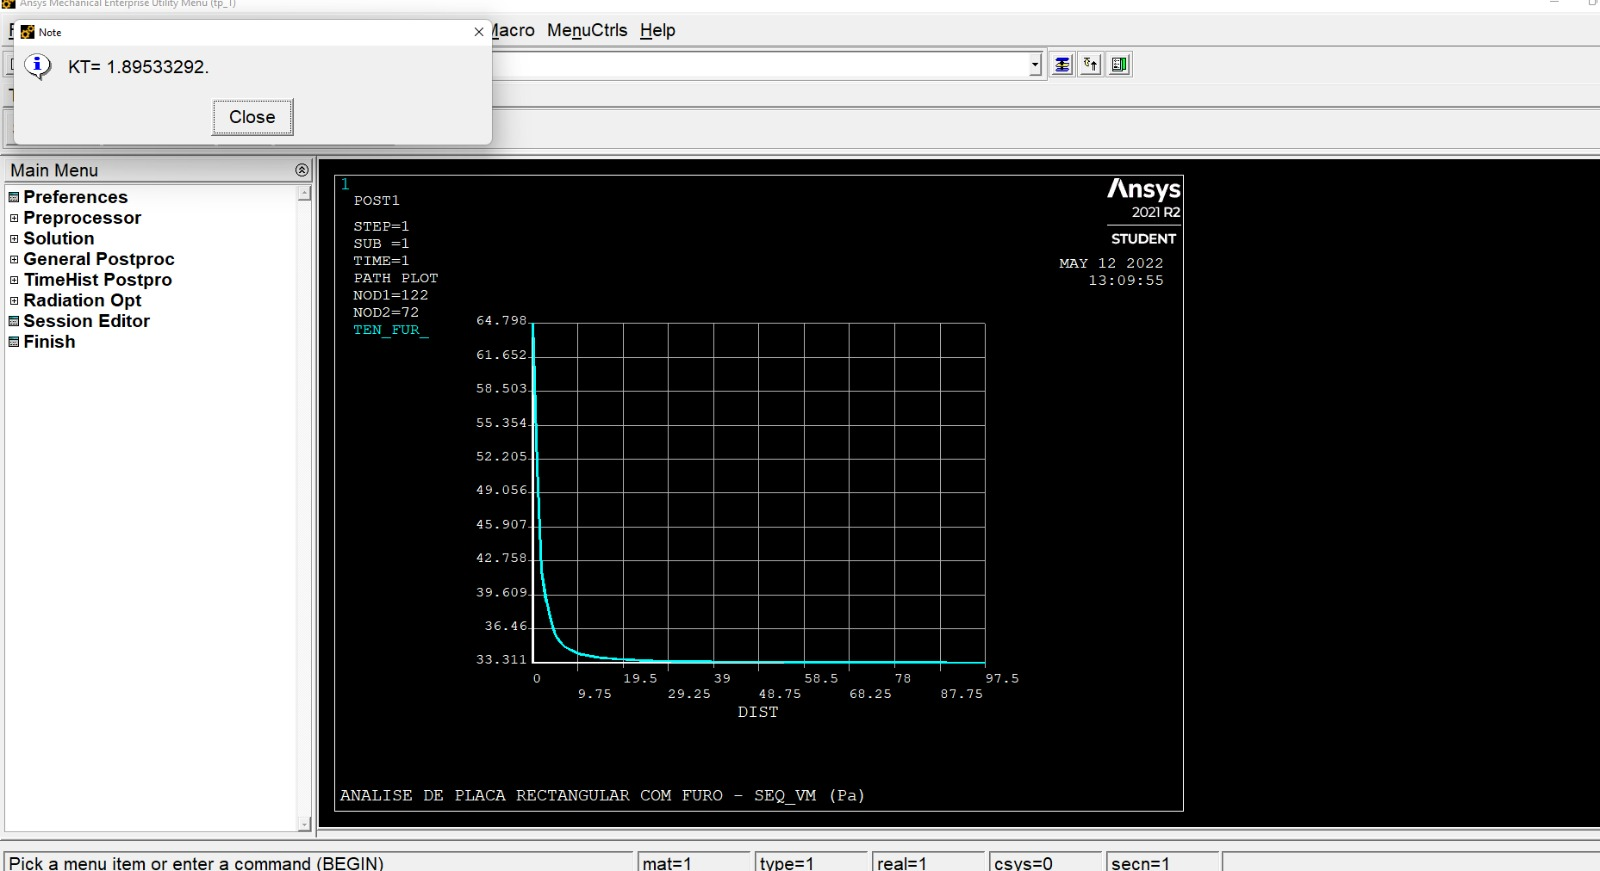

fig.3

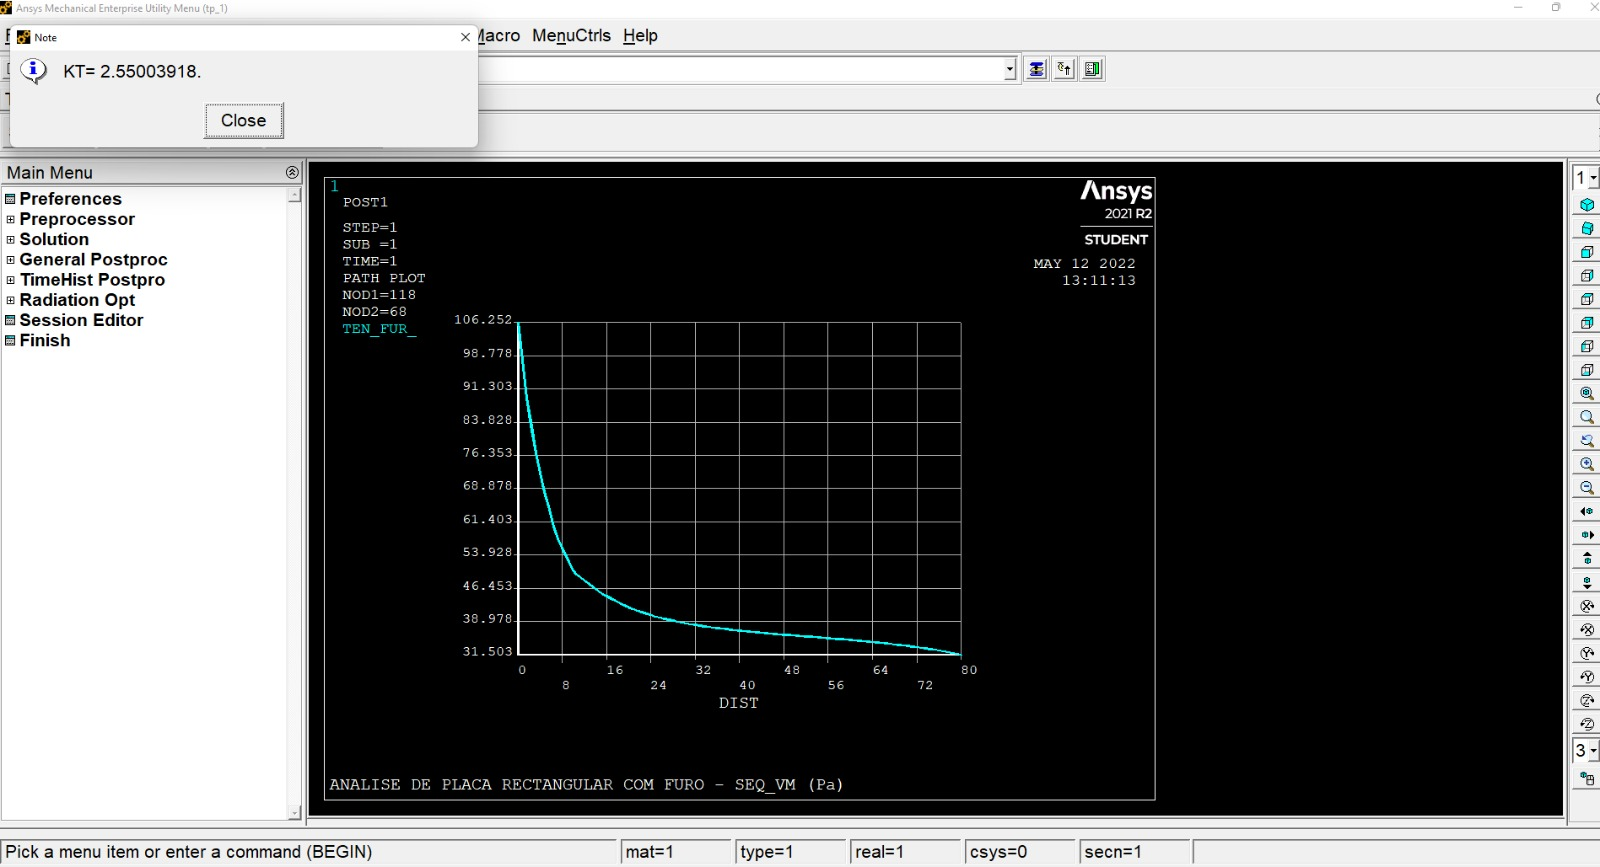

fig.4

**<a name="Ponto3">3.</a> Compare e discuta os campos de deformação numérico e
experimental para o problema da placa com furo.**


**Campos de deformação obtidos pela técnica de Correlação Digital de Imagem:**

> **$\varepsilon_{xx}$**

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/exx.png" width="500" height="350">

> **$\varepsilon_{yy}$**

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/eyy.png" width="500" height="350">

> **$\varepsilon_{xy}$**

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/exy.png" width="500" height="350">



**Campos de deformação obtidos pelo Ansys:**

> **$\varepsilon_{xx}$**
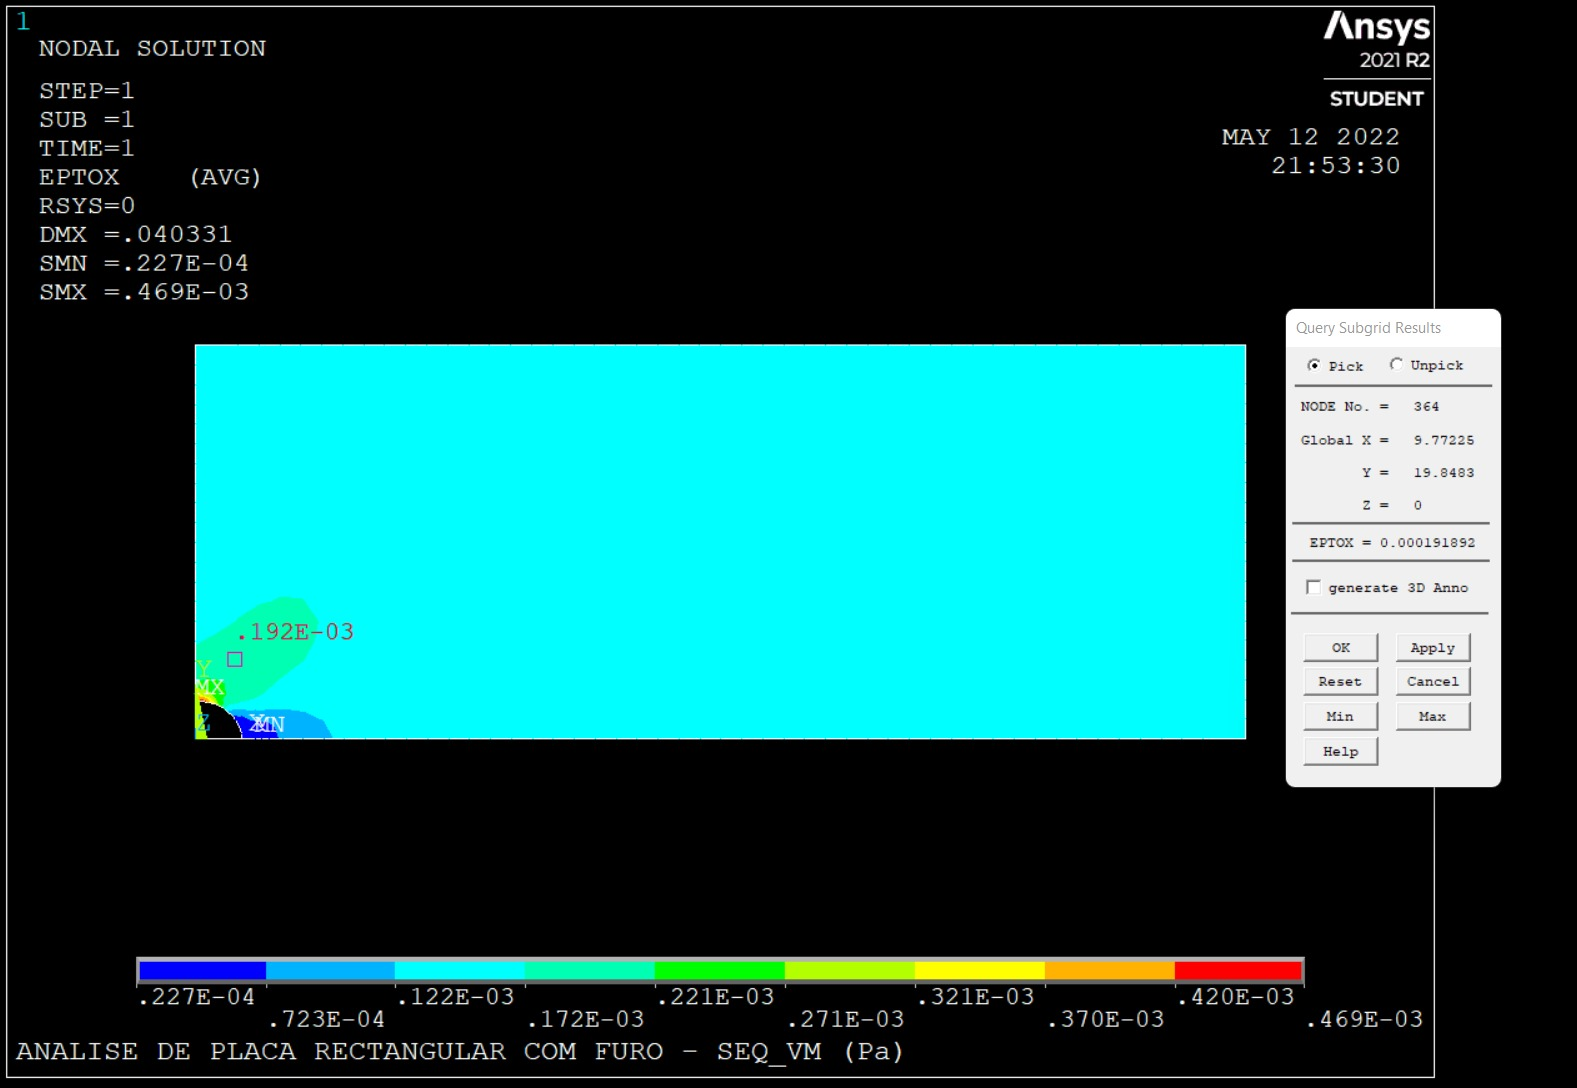
> **$\varepsilon_{yy}$**
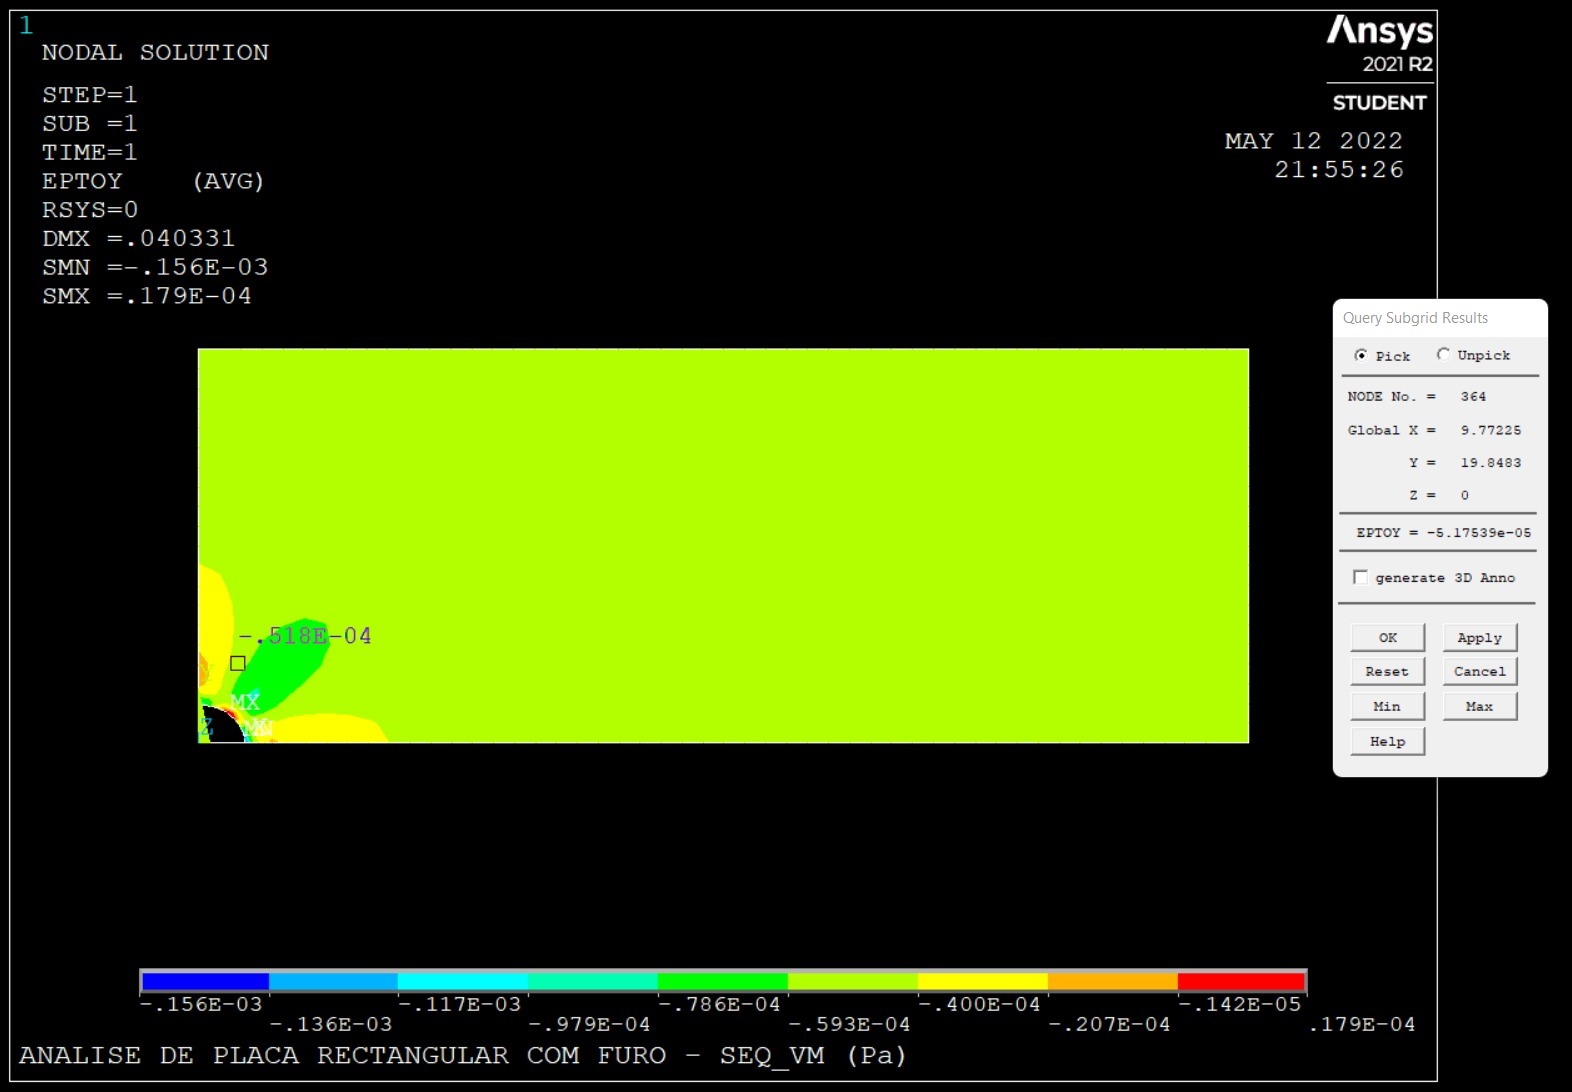
> **$\varepsilon_{xy}$**
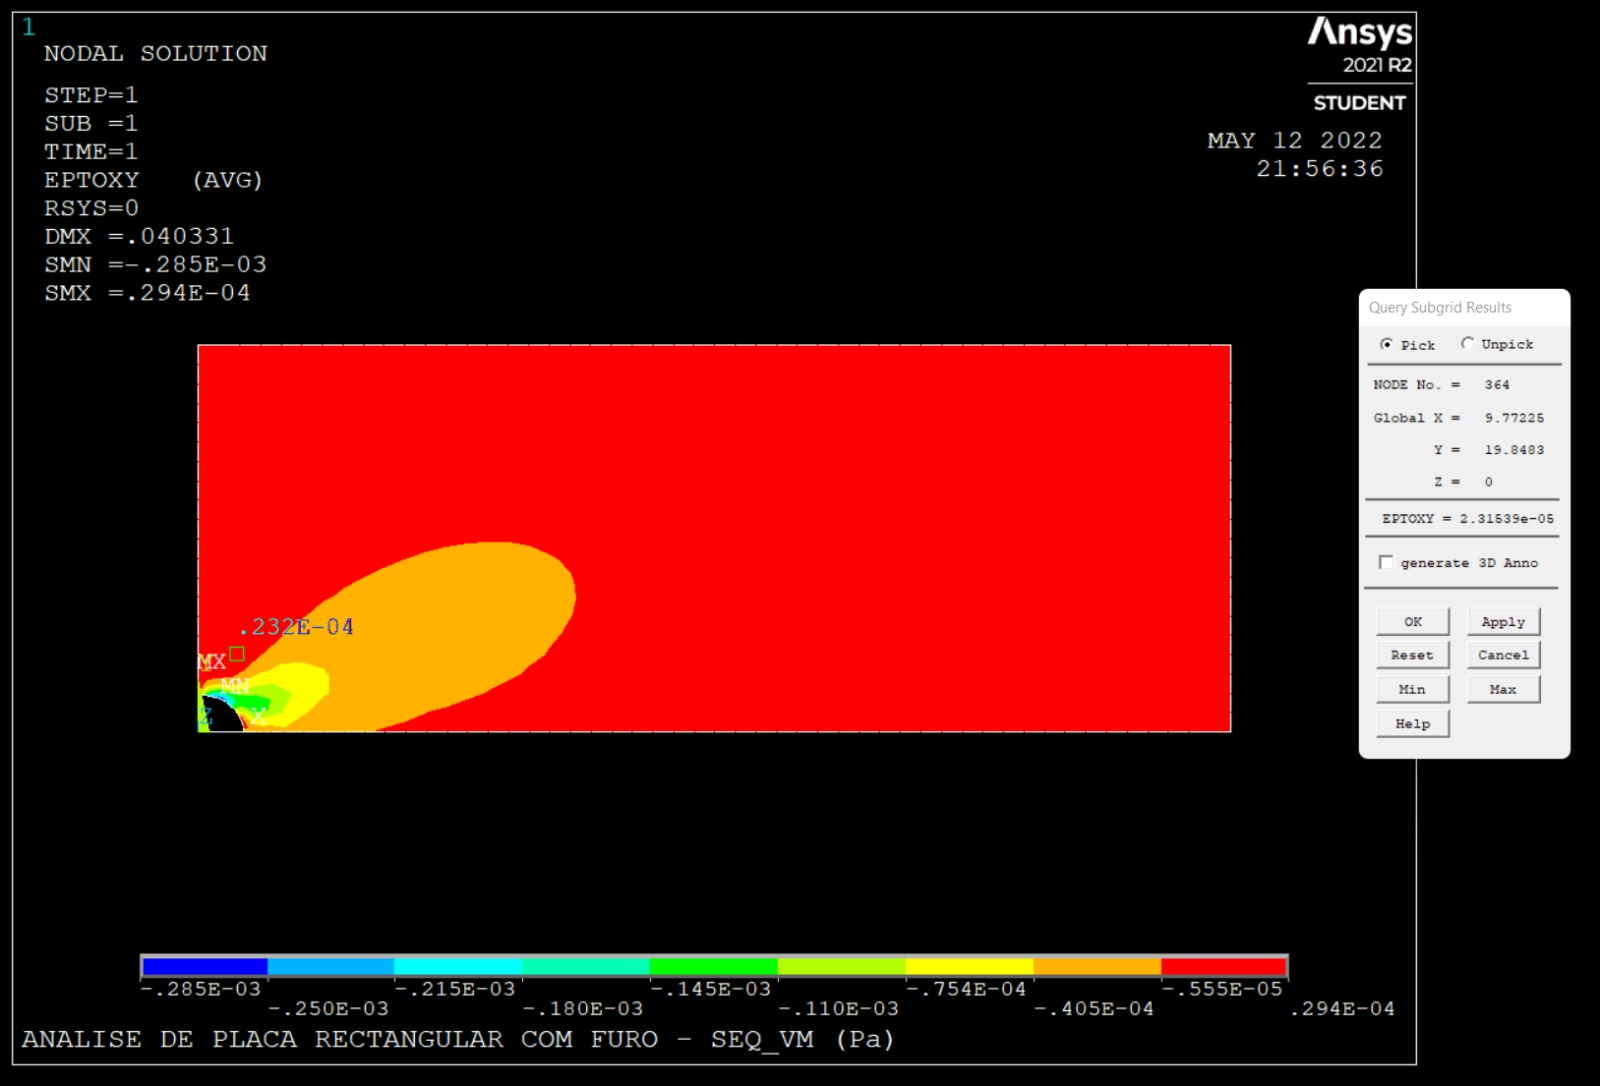

**Discussão/Comparação:**

Através dos campos de deformação obtidos pelo ANSYS, destaca-se desde logo que a zona da placa onde se verifica um maior número de valores de deformação é na região do furo (já era de prever dado que o furo foi obtido por uma operação de fresagem). Tirando a zona mais próxima do furo, a deformação verificada no resto da placa basicamente uniforme.

Comparando os valores de deformação experimentais com os valores numéricos, verifica-se uma discrepância de valores onde a deformação obtida experimentalmente é superior do que a obtida numericamente. Esta divergência encontra-se na região mais próxima do furo (entre os 10mm e 30mm).

